In [170]:

import pandas as pd
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [171]:
df = pd.read_csv('Resources/US_French_Chardonnays.csv')
df

,Unnamed: 0,ID,alcohol,category,country,description,designation,index,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,0,NaN,13.0,White,France,Just a hint of pear peel rises from the nose. ...,Secret de notre Terroir Chard'MMXV,1017.0,28.0,92,Alsace,Alsace,NaN,Domaine Charles Baur 2015 Secret de notre Terr...,https://www.winemag.com/buying-guide/domaine-c...,Chardonnay,2015,Domaine Charles Baur
1,1,NaN,13.5,White,France,"Named after the vineyard, this wood-aged wine ...",Eparcieux,3741.0,23.0,90,Beaujolais,Beaujolais Blanc,NaN,Domaine Chasselay 2017 Eparcieux (Beaujolais ...,https://www.winemag.com/buying-guide/domaine-c...,Chardonnay,2017,Domaine Chasselay
2,2,NaN,12.5,White,France,"Vines in the first flush of youth, are behind ...",Les Chardonnerets,3742.0,18.0,88,Beaujolais,Beaujolais Blanc,NaN,Domaine Franck Besson 2017 Les Chardonnerets ...,https://www.winemag.com/buying-guide/domaine-f...,Chardonnay,2017,Domaine Franck Besson
3,3,NaN,13.5,White,France,"Grown on a mix of granite and chalk soils, thi...",Collonge,3743.0,19.0,88,Beaujolais,Beaujolais Blanc,NaN,Domaines Chermette 2016 Collonge (Beaujolais ...,https://www.winemag.com/buying-guide/domaines-...,Chardonnay,2016,Domaines Chermette
4,4,NaN,13.0,White,France,"This warm, ripe wine has attractive yellow-fru...",NaN,3744.0,18.0,88,Beaujolais,Beaujolais Blanc,NaN,Gilles Gelin 2017 Beaujolais Blanc,https://www.winemag.com/buying-guide/gilles-ge...,Chardonnay,2017,Gilles Gelin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,14364,248214.0,14.4,White,US,"Front-loaded with fruit, this extraordinarily ...",Rosella's Vineyard,NaN,44.0,90,California,Central Coast,Santa Lucia Highlands,Testarossa 2005 Rosella's Vineyard Chardonnay ...,https://www.winemag.com/buying-guide/testaross...,Chardonnay,2005,Testarossa
13689,14365,248312.0,14.5,White,US,This is a great expression of what winemaker R...,Camelot Highlands Estate,NaN,25.0,91,California,Central Coast,Santa Maria Valley,Kendall-Jackson 2005 Camelot Highlands Estate ...,https://www.winemag.com/buying-guide/kendall-j...,Chardonnay,2005,Kendall-Jackson
13690,14366,248330.0,14.5,White,US,What a great Chard. Just delicious in palate-f...,Seco Highlands Estate,NaN,30.0,92,California,Central Coast,Arroyo Seco,Kendall-Jackson 2005 Seco Highlands Estate Cha...,https://www.winemag.com/buying-guide/kendall-j...,Chardonnay,2005,Kendall-Jackson
13691,14367,248342.0,15.2,White,US,"This is a new winery for me, but one to watch....",Reserve,NaN,29.0,92,California,Central Coast,Santa Barbara County,Addamo 2005 Reserve Chardonnay (Santa Barbara ...,https://www.winemag.com/buying-guide/addamo-20...,Chardonnay,2005,Addamo


In [172]:
df = df.drop(['Unnamed: 0', 'ID', 'index', 'category', 'description', 'designation', 'subsubregion', 'title', 'url', 'varietal', 'winery'], axis=1)
df.head()


,alcohol,country,price,rating,region,subregion,vintage
0,13.0,France,28.0,92,Alsace,Alsace,2015
1,13.5,France,23.0,90,Beaujolais,Beaujolais Blanc,2017
2,12.5,France,18.0,88,Beaujolais,Beaujolais Blanc,2017
3,13.5,France,19.0,88,Beaujolais,Beaujolais Blanc,2016
4,13.0,France,18.0,88,Beaujolais,Beaujolais Blanc,2017


In [173]:
X_df = pd.DataFrame(df)
X_df.dtypes
X_df['subregion'] = X_df['subregion'].astype(str)
# X_df['vintage'] = X_df['vintage'].astype(float)

In [174]:
X = X_df.drop("price", axis=1)
y = df["price"]

In [175]:
X= X.apply(LabelEncoder().fit_transform)
X

,alcohol,country,rating,region,subregion,vintage
0,30,0,12,0,0,21
1,41,0,10,3,5,23
2,21,0,8,3,5,23
3,41,0,8,3,5,22
4,30,0,8,3,5,23
...,...,...,...,...,...,...
13688,68,1,10,5,19,11
13689,73,1,11,5,19,11
13690,73,1,12,5,19,11
13691,84,1,12,5,19,11


In [176]:
X = X.values.astype("float32")
print(X)
y = y.values.astype("float32")
print(y)

[[30.  0. 12.  0.  0. 21.]
 [41.  0. 10.  3.  5. 23.]
 [21.  0.  8.  3.  5. 23.]
 ...
 [73.  1. 12.  5. 19. 11.]
 [84.  1. 12.  5. 19. 11.]
 [65.  1. 12.  5. 18. 11.]]
[28. 23. 18. ... 30. 29. 55.]


In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(3424,)
(3424, 6)


In [178]:
scaler_model = StandardScaler()

In [179]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [180]:
X_scaler = scaler_model.fit(X_train)
y_scaler = scaler_model.fit(y_train)

In [181]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [182]:
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [183]:
input_dims = X_train.shape[1]
input_dims

6

In [219]:
model = []
model = Sequential()
model.add(Dense(64, activation = 'relu', name='dense_1', kernel_initializer='glorot_uniform', input_dim=(input_dims)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', name='dense_2', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear', name='predictions'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
predictions (Dense)          (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [220]:
from numpy import sqrt,asarray
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
history = model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=10,  verbose=1, validation_split=0.2)


Train on 8215 samples, validate on 2054 samples
Epoch 1/30
8215/8215 [==============================] - 2s 185us/step - loss: 0.8816 - mse: 0.8816 - mae: 0.4559 - val_loss: 1.3522 - val_mse: 1.3522 - val_mae: 0.4631
Epoch 2/30
8215/8215 [==============================] - 1s 134us/step - loss: 0.8092 - mse: 0.8092 - mae: 0.4212 - val_loss: 1.2320 - val_mse: 1.2320 - val_mae: 0.4058
Epoch 3/30
8215/8215 [==============================] - 1s 133us/step - loss: 0.7220 - mse: 0.7220 - mae: 0.3939 - val_loss: 1.1104 - val_mse: 1.1104 - val_mae: 0.3987
Epoch 4/30
8215/8215 [==============================] - 1s 130us/step - loss: 0.6789 - mse: 0.6789 - mae: 0.3797 - val_loss: 1.0856 - val_mse: 1.0856 - val_mae: 0.3758
Epoch 5/30
8215/8215 [==============================] - 1s 133us/step - loss: 0.6381 - mse: 0.6381 - mae: 0.3700 - val_loss: 0.9980 - val_mse: 0.9980 - val_mae: 0.3647
Epoch 6/30
8215/8215 [==============================] - 1s 121us/step - loss: 0.6044 - mse: 0.6044 - mae: 0.3596

In [221]:
error = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
# print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
print(error, sqrt(error))

[0.4897405528855101, 0.4897405803203583, 0.32808488607406616] [0.69981466 0.69981468 0.57278695]


In [21]:
# model.save('modelSS.h5')

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


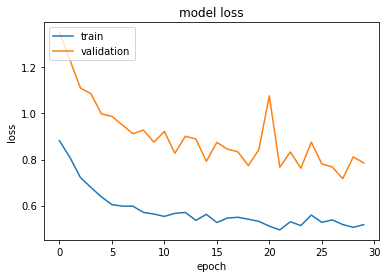

In [222]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
# from collections import defaultdict
# d = defaultdict(LabelEncoder)

# labeled_df = X_df.apply(lambda x: d[x.name].fit_transform(x))
# labeled_df
# labeled_df.apply(lambda x: d[x.name].inverse_transform(x))

In [225]:
test = np.expand_dims(X_train_scaled[0], axis=0)
inversedX = scaler_model.inverse_transform(test)
inversedy = scaler_model.inverse_transform(y_train_scaled[0])

In [226]:
print(f"Predicted price: {model.predict(inversedX)}")
print(f"Actual price: {inversedy}")

Predicted price: [[35.079662]]
Actual price: [30.]
